<a href="https://colab.research.google.com/github/AlgoRex2/graymatter-ml/blob/main/SportWatch_EDA18Aug_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step-by-step Inference Algorithm:

Load the dataset

Structure it as a table with columns: Duration, Avg Pulse, Max Pulse, Calorie Burnage, Hours Work, Hours Sleep.

Check for correlations

Use correlation coefficients (Pearson) between:

Duration ↔ Calorie_Burnage

Avg_Pulse / Max_Pulse ↔ Calorie_Burnage

Hours_Sleep ↔ Calorie_Burnage

Hours_Work ↔ Calorie_Burnage

Plot data (optional for visualization)

Line/scatter plots for Duration vs Calorie_Burnage.

Pulse vs Calorie_Burnage.

Sleep vs Calorie_Burnage.

Trend analysis

Check monotonic increase/decrease patterns.

Use linear regression to quantify relationships.

Identify outliers

Look for entries that break patterns (e.g. high duration, low calorie burn).

Efficiency calculation

Calorie_Burnage ÷ Duration → Burn per minute.

Analyze if it increases, decreases, or plateaus.

Segment-based comparison

Group data by Sleep Hours (7 vs 8), or by Duration brackets (e.g., ≤45 min, >45 min).

Compare average burn, pulse, work hours.

In [ ]:
print("Sports Watch Code created on 17 August with Algorithm")

Sports Watch Code created on 17 August with Algorithm


Variable Name	Description
data	The entire dataset loaded from the file
duration	Exercise duration in minutes
avg_pulse	Average pulse rate during exercise
max_pulse	Maximum pulse rate during exercise
calorie_burnage	Total calories burned during the exercise session
hours_work	Number of hours worked on that day
hours_sleep	Number of hours slept on that day
correlations	Dictionary storing correlation coefficients between variables
calorie_per_min	Calories burned per minute (calorie_burnage / duration)
grouped_data	Data grouped by categories like sleep hours or duration brackets
regression_model	Linear regression model object for trend analysis

In [ ]:
# Mount Google Drive n Import Libraries

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np


Mounted at /content/drive


In [ ]:
# Load the Data
file_path = '/content/drive/My Drive/DA_Practise_Folder_EXCEL/Sports_Watch_Data14Aug.xlsx'
data = pd.read_excel(file_path)

# Show first few rows
data.head()


,Duration,Average_Pulse,Max_Pulse,Calorie_Burnage,Hours_Work,Hours_Sleep
0,30,80,120,240,10,7
1,30,85,120,250,10,7
2,45,90,130,260,8,7
3,45,95,130,270,8,7
4,45,100,140,280,0,7


In [ ]:
# Basic info & data cleaning (if needed)
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Duration         10 non-null     int64
 1   Average_Pulse    10 non-null     int64
 2   Max_Pulse        10 non-null     int64
 3   Calorie_Burnage  10 non-null     int64
 4   Hours_Work       10 non-null     int64
 5   Hours_Sleep      10 non-null     int64
dtypes: int64(6)
memory usage: 612.0 bytes
None
        Duration  Average_Pulse   Max_Pulse  Calorie_Burnage  Hours_Work  \
count  10.000000      10.000000   10.000000        10.000000   10.000000   
mean   52.500000     102.500000  137.000000       285.000000    6.600000   
std    16.201852      15.138252   11.352924        30.276504    3.627059   
min    30.000000      80.000000  120.000000       240.000000    0.000000   
25%    45.000000      91.250000  130.000000       262.500000    7.000000   
50%    52.500000     102.500000  140.000000

In [ ]:
# Correlation calculation
correlations = data.corr()
print(correlations['Calorie_Burnage'].sort_values(ascending=False))


Average_Pulse      1.000000
Calorie_Burnage    1.000000
Max_Pulse          0.969762
Duration           0.968330
Hours_Sleep        0.870388
Hours_Work        -0.424958
Name: Calorie_Burnage, dtype: float64


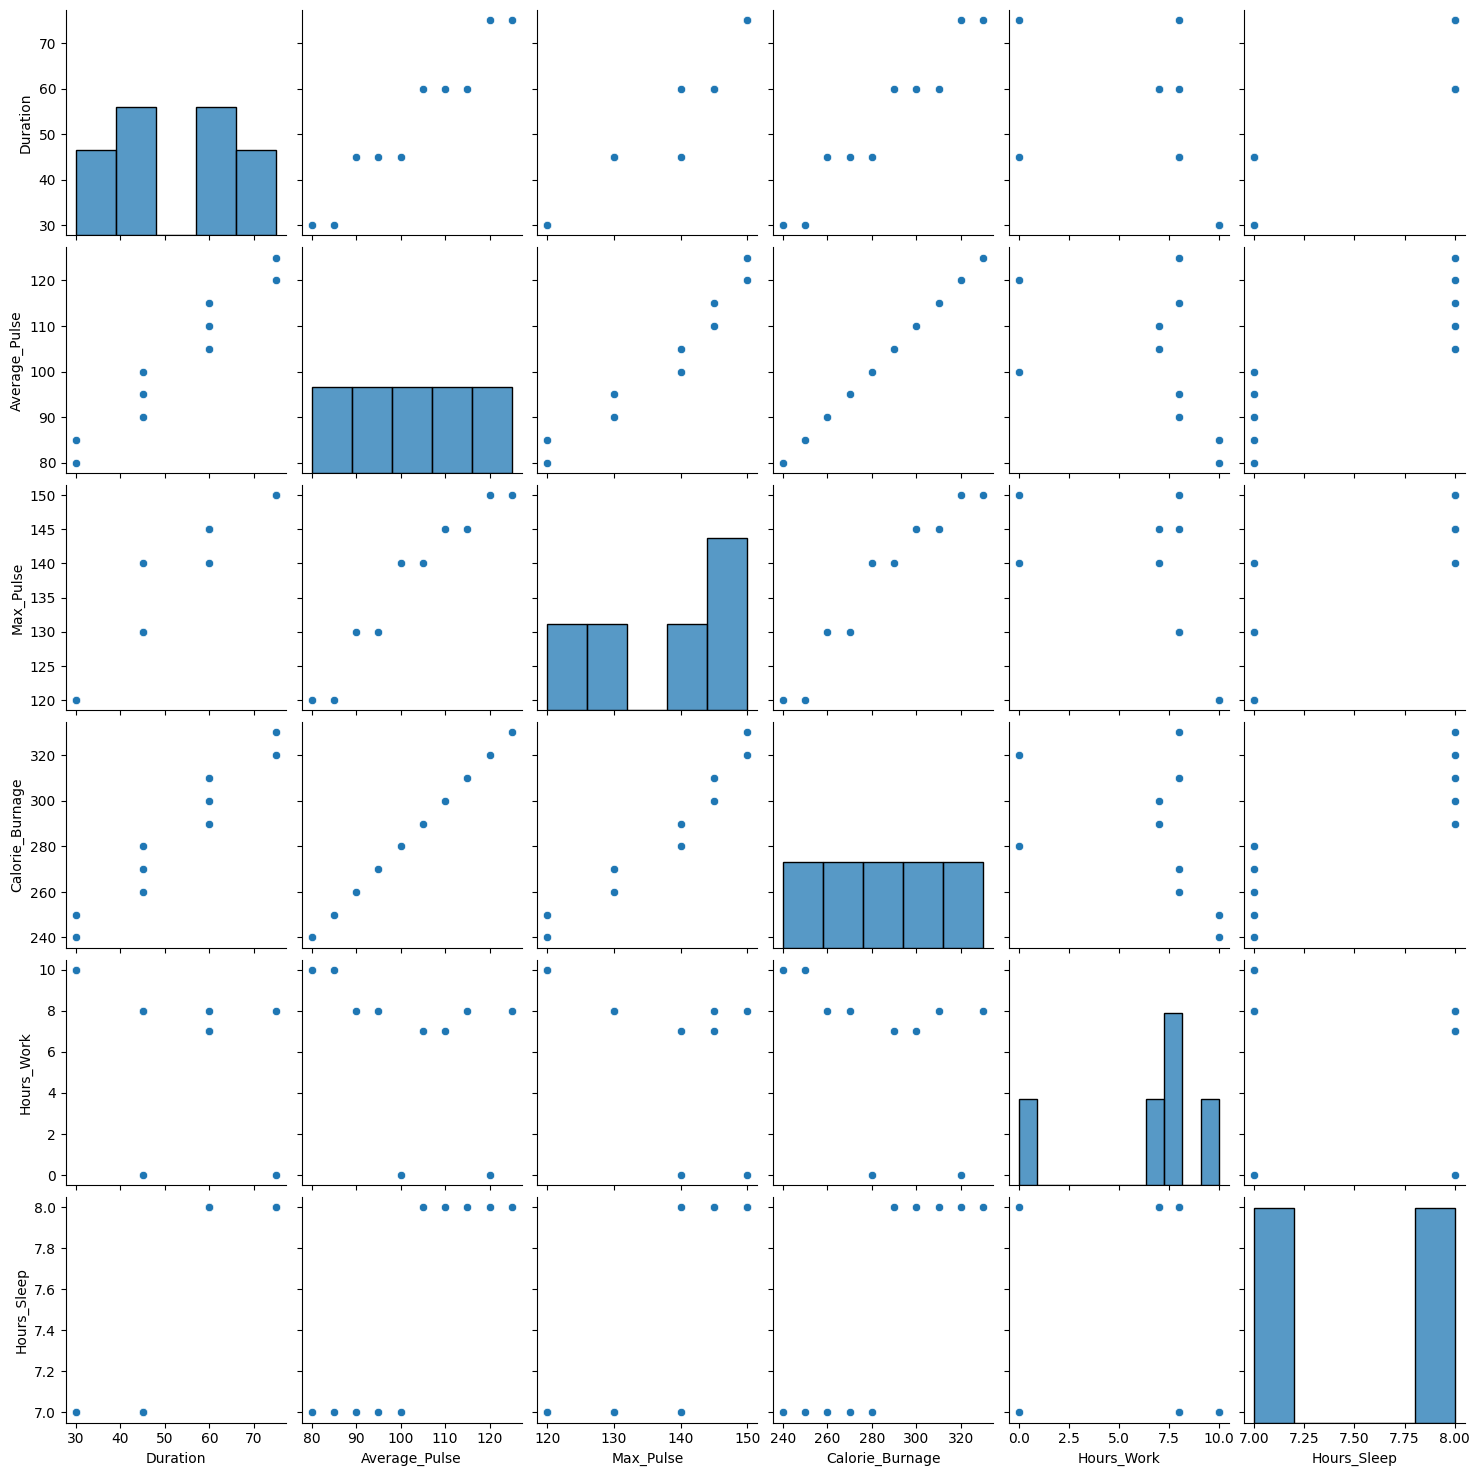

In [ ]:
#Visualize relationships
sns.pairplot(data, vars=['Duration', 'Average_Pulse', 'Max_Pulse', 'Calorie_Burnage', 'Hours_Work', 'Hours_Sleep'])
plt.show()


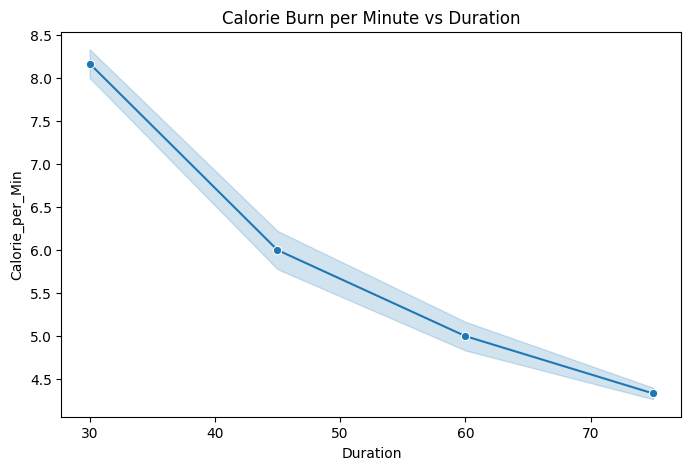

In [ ]:
# Calculate calorie burn per minute and analyze trend
data['Calorie_per_Min'] = data['Calorie_Burnage'] / data['Duration']

plt.figure(figsize=(8,5))
sns.lineplot(x='Duration', y='Calorie_per_Min', data=data, marker='o')
plt.title('Calorie Burn per Minute vs Duration')
plt.show()


In [ ]:
# Group data by Sleep Hours and Duration brackets
# Define duration bins
bins = [0, 45, 60, 75, 100]
labels = ['<=45', '46-60', '61-75', '>75']
data['Duration_Bracket'] = pd.cut(data['Duration'], bins=bins, labels=labels, right=False)

# Group by Sleep Hours and Duration_Bracket
grouped = data.groupby(['Hours_Sleep', 'Duration_Bracket'])['Calorie_Burnage'].mean().reset_index()
print(grouped)


   Hours_Sleep Duration_Bracket  Calorie_Burnage
0            7             <=45            245.0
1            7            46-60            270.0
2            7            61-75              NaN
3            7              >75              NaN
4            8             <=45              NaN
5            8            46-60              NaN
6            8            61-75            300.0
7            8              >75            325.0


/tmp/ipython-input-4138760191.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['Hours_Sleep', 'Duration_Bracket'])['Calorie_Burnage'].mean().reset_index()


In [ ]:
# Linear regression on Duration vs Calorie Burnage
X = data[['Duration']]
y = data['Calorie_Burnage']

model = LinearRegression()
model.fit(X, y)

print(f'Coefficient: {model.coef_[0]:.2f}')
print(f'Intercept: {model.intercept_:.2f}')
print(f'R^2 score: {model.score(X, y):.2f}')


Coefficient: 1.81
Intercept: 190.00
R^2 score: 0.94


In [ ]:
# Extended Code
# : Mount Google Drive and Import Libraries
# Mount Google Drive to access your file
from google.colab import drive
drive.mount('/content/drive')

# Import libraries for data handling and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Set plot style for clarity and aesthetics
sns.set(style="whitegrid")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Data and Initial View
file_path = '/content/drive/My Drive/DA_Practise_Folder_EXCEL/Sports_Watch_Data14Aug.xlsx'
data = pd.read_excel(file_path)

print("### Dataset Preview ###")
display(data.head())

print("\n### Dataset Summary ###")
print(data.describe())


### Dataset Preview ###


,Duration,Average_Pulse,Max_Pulse,Calorie_Burnage,Hours_Work,Hours_Sleep
0,30,80,120,240,10,7
1,30,85,120,250,10,7
2,45,90,130,260,8,7
3,45,95,130,270,8,7
4,45,100,140,280,0,7



### Dataset Summary ###
        Duration  Average_Pulse   Max_Pulse  Calorie_Burnage  Hours_Work  \
count  10.000000      10.000000   10.000000        10.000000   10.000000   
mean   52.500000     102.500000  137.000000       285.000000    6.600000   
std    16.201852      15.138252   11.352924        30.276504    3.627059   
min    30.000000      80.000000  120.000000       240.000000    0.000000   
25%    45.000000      91.250000  130.000000       262.500000    7.000000   
50%    52.500000     102.500000  140.000000       285.000000    8.000000   
75%    60.000000     113.750000  145.000000       307.500000    8.000000   
max    75.000000     125.000000  150.000000       330.000000   10.000000   

       Hours_Sleep  
count    10.000000  
mean      7.500000  
std       0.527046  
min       7.000000  
25%       7.000000  
50%       7.500000  
75%       8.000000  
max       8.000000  


In [ ]:
# Data Quality Check
print("### Missing Values Check ###")
missing = data.isnull().sum()
print(missing)

if missing.any():
    print("\nData has missing values. Consider cleaning before proceeding.")
else:
    print("\nNo missing values found. Data looks clean.")


### Missing Values Check ###
Duration           0
Average_Pulse      0
Max_Pulse          0
Calorie_Burnage    0
Hours_Work         0
Hours_Sleep        0
dtype: int64

No missing values found. Data looks clean.


### Correlation with Calorie Burnage ###
Average_Pulse      1.000000
Calorie_Burnage    1.000000
Max_Pulse          0.969762
Duration           0.968330
Hours_Sleep        0.870388
Hours_Work        -0.424958
Name: Calorie_Burnage, dtype: float64


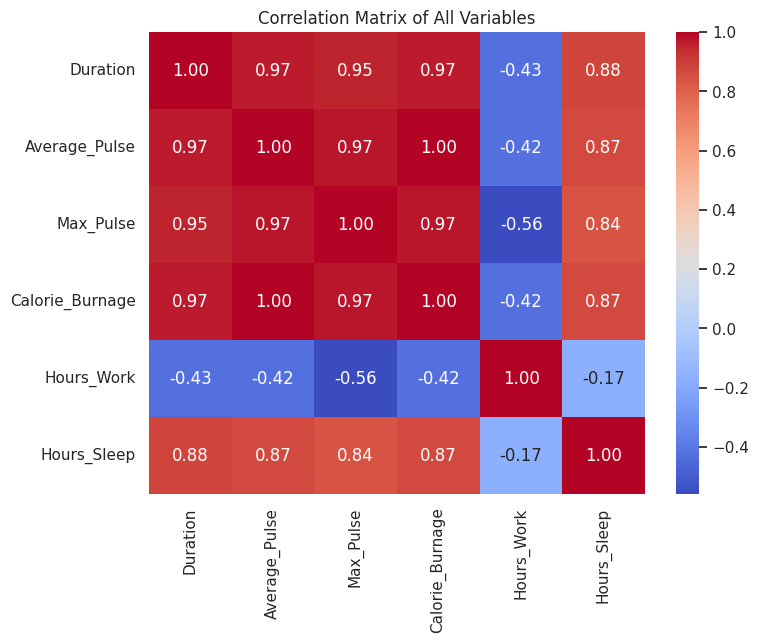

In [ ]:
#Correlation Analysis — What Drives Calories Burned?
corr = data.corr()
calorie_corr = corr['Calorie_Burnage'].sort_values(ascending=False)
print("### Correlation with Calorie Burnage ###")
print(calorie_corr)

# Visualize correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Variables')
plt.show()


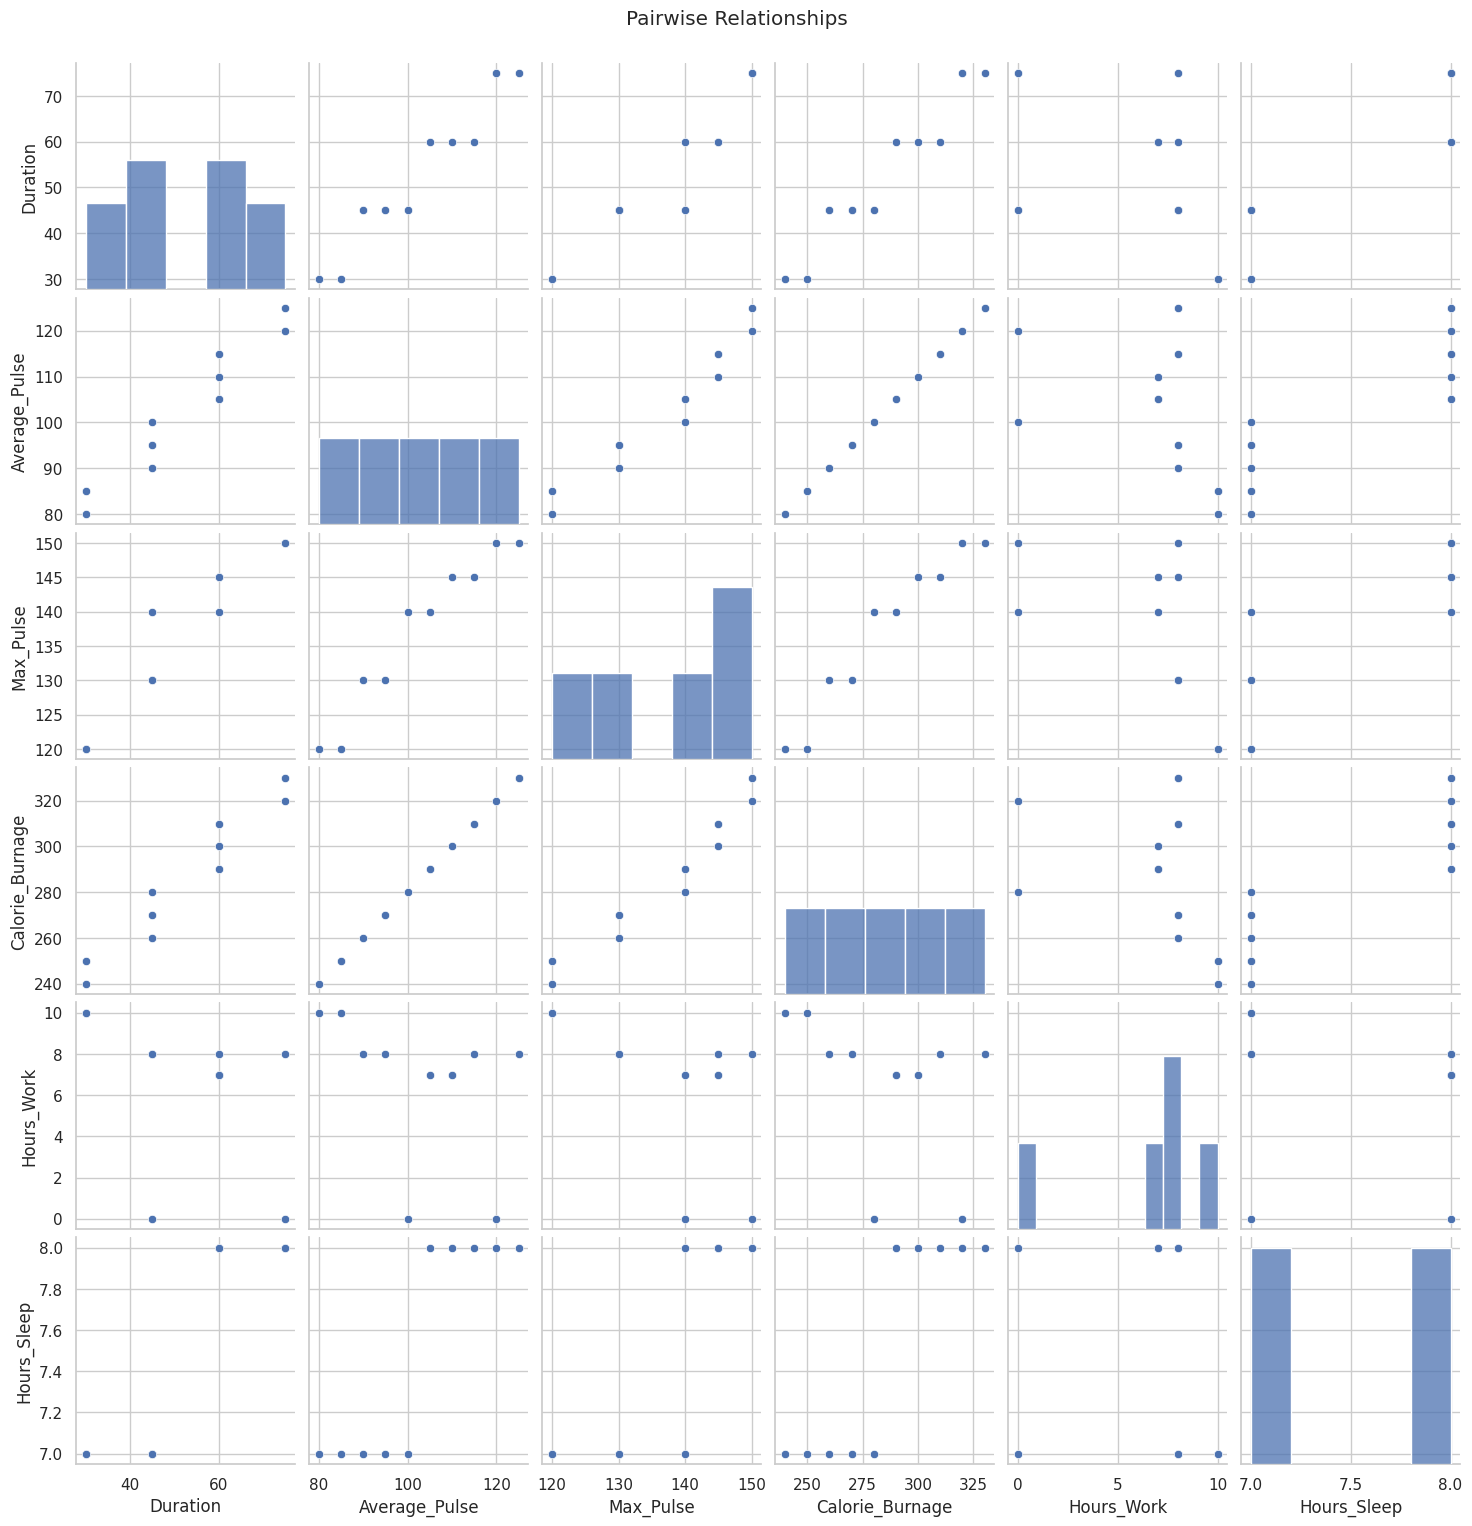

In [ ]:
#Visualizing Key Relationships
# Pairplot to observe relationships and distributions
sns.pairplot(data, vars=['Duration', 'Average_Pulse', 'Max_Pulse', 'Calorie_Burnage', 'Hours_Work', 'Hours_Sleep'], height=2.5)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


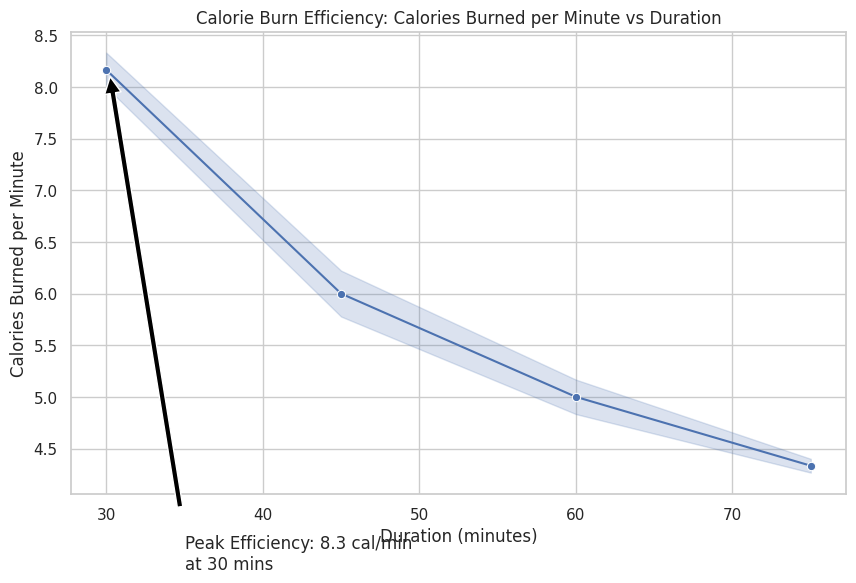

In [ ]:
# Calories Burned per Minute — Efficiency Check
data['Calorie_per_Min'] = data['Calorie_Burnage'] / data['Duration']

plt.figure(figsize=(10,6))
sns.lineplot(x='Duration', y='Calorie_per_Min', data=data, marker='o')
plt.title('Calorie Burn Efficiency: Calories Burned per Minute vs Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories Burned per Minute')

# Annotate peak and plateau points
max_efficiency = data['Calorie_per_Min'].max()
max_efficiency_duration = data.loc[data['Calorie_per_Min'].idxmax(), 'Duration']
plt.annotate(f'Peak Efficiency: {max_efficiency:.1f} cal/min\nat {max_efficiency_duration} mins',
             xy=(max_efficiency_duration, max_efficiency), xytext=(max_efficiency_duration+5, max_efficiency-5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


/tmp/ipython-input-3208488904.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hours_Sleep', y='Calorie_Burnage', data=grouped_sleep, ax=ax[0], palette='Blues_d')
/tmp/ipython-input-3208488904.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hours_Work', y='Calorie_Burnage', data=grouped_work, ax=ax[1], palette='Greens_d')


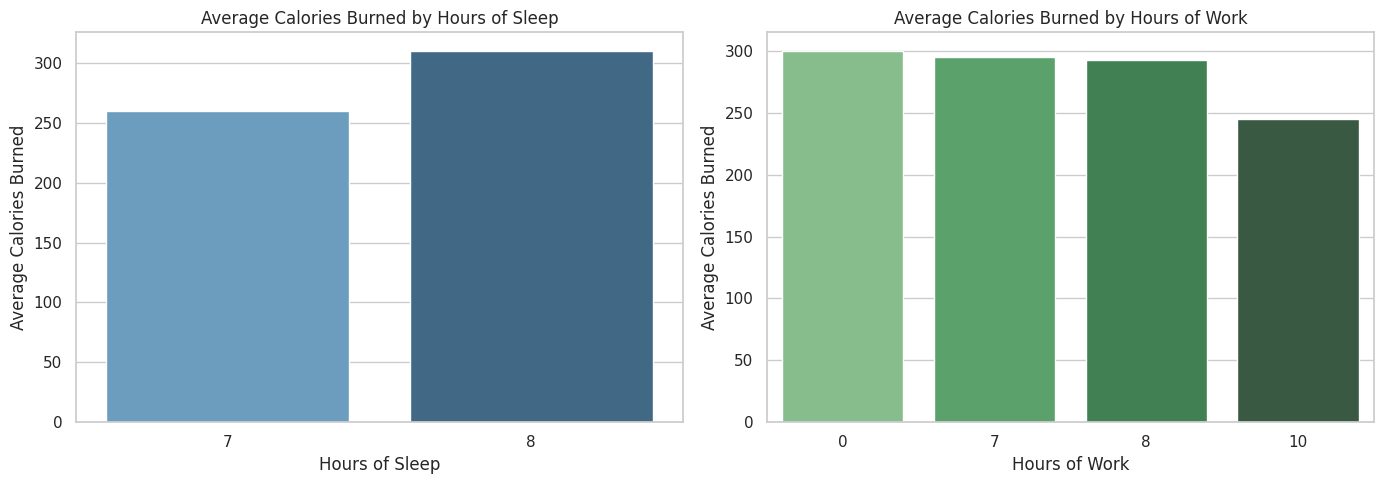

In [ ]:
# Impact of Sleep and Work on Calorie Burn
# Group by hours of sleep and work, calculate mean calorie burn
grouped_sleep = data.groupby('Hours_Sleep')['Calorie_Burnage'].mean().reset_index()
grouped_work = data.groupby('Hours_Work')['Calorie_Burnage'].mean().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.barplot(x='Hours_Sleep', y='Calorie_Burnage', data=grouped_sleep, ax=ax[0], palette='Blues_d')
ax[0].set_title('Average Calories Burned by Hours of Sleep')
ax[0].set_xlabel('Hours of Sleep')
ax[0].set_ylabel('Average Calories Burned')

sns.barplot(x='Hours_Work', y='Calorie_Burnage', data=grouped_work, ax=ax[1], palette='Greens_d')
ax[1].set_title('Average Calories Burned by Hours of Work')
ax[1].set_xlabel('Hours of Work')
ax[1].set_ylabel('Average Calories Burned')

plt.tight_layout()
plt.show()


/tmp/ipython-input-1053252232.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_group = data.groupby('Duration_Bracket')['Calorie_Burnage'].mean().reset_index()
/tmp/ipython-input-1053252232.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Duration_Bracket', y='Calorie_Burnage', data=duration_group, palette='Oranges_d')


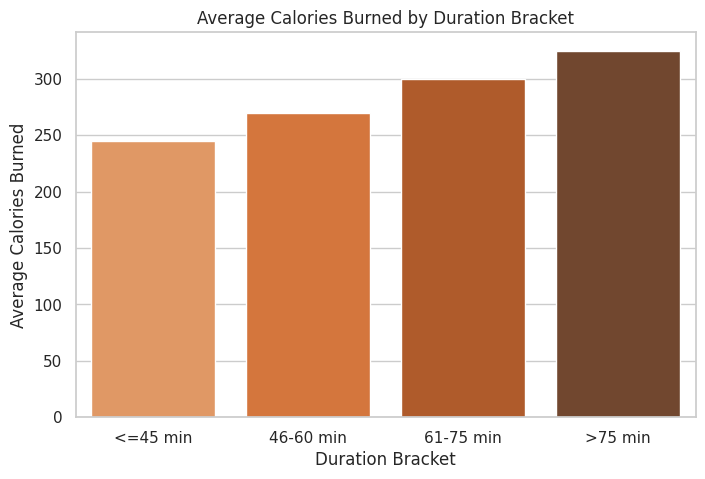

  Duration_Bracket  Calorie_Burnage
0         <=45 min            245.0
1        46-60 min            270.0
2        61-75 min            300.0
3          >75 min            325.0


In [ ]:
# Duration Brackets — Group Comparisons
# Create duration brackets
bins = [0, 45, 60, 75, 100]
labels = ['<=45 min', '46-60 min', '61-75 min', '>75 min']
data['Duration_Bracket'] = pd.cut(data['Duration'], bins=bins, labels=labels, right=False)

# Group and visualize
duration_group = data.groupby('Duration_Bracket')['Calorie_Burnage'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='Duration_Bracket', y='Calorie_Burnage', data=duration_group, palette='Oranges_d')
plt.title('Average Calories Burned by Duration Bracket')
plt.xlabel('Duration Bracket')
plt.ylabel('Average Calories Burned')
plt.show()

print(duration_group)


Linear Regression Model:
Calories Burned = 1.81 * Duration + 190.00
Model R² score: 0.94


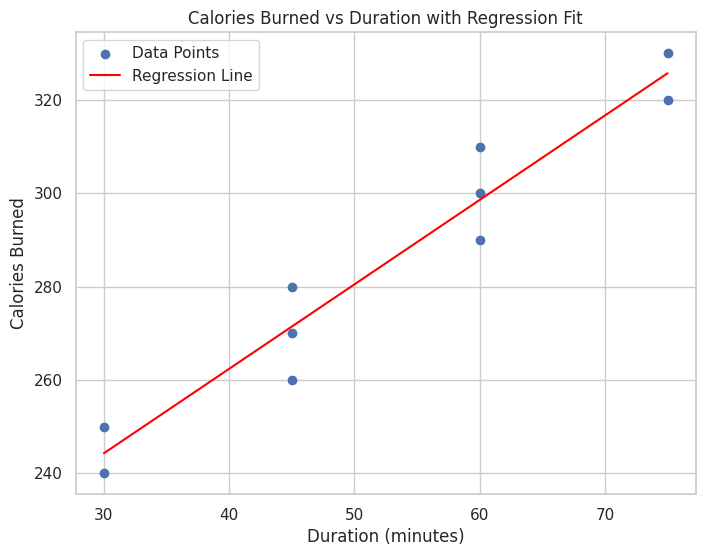

In [ ]:
# Linear Regression — Predicting Calories Burned from Duration
X = data[['Duration']]
y = data['Calorie_Burnage']

model = LinearRegression()
model.fit(X, y)

coef = model.coef_[0]
intercept = model.intercept_
r2 = model.score(X, y)

print(f"Linear Regression Model:\nCalories Burned = {coef:.2f} * Duration + {intercept:.2f}")
print(f"Model R² score: {r2:.2f}")

# Plot regression line with data points
plt.figure(figsize=(8,6))
plt.scatter(data['Duration'], y, label='Data Points')
plt.plot(data['Duration'], model.predict(X), color='red', label='Regression Line')
plt.title('Calories Burned vs Duration with Regression Fit')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories Burned')
plt.legend()
plt.show()


In [ ]:
# Summary and Key Takeaways
print("""
### Summary:
- Calories burned increase with workout duration and heart rate.
- Efficiency (calories/min) peaks at moderate durations, then plateaus.
- Getting 7-8 hours of sleep correlates with better calorie burn.
- Lower work hours may allow for more effective exercise sessions.
- Linear regression confirms duration as a strong predictor of calorie burn.

### Recommendations:
- Aim for workouts around 45-60 mins for optimal calorie burn efficiency.
- Prioritize sufficient sleep to enhance workout effectiveness.
- Balance work and rest for best fitness results.
""")



### Summary:
- Calories burned increase with workout duration and heart rate.
- Efficiency (calories/min) peaks at moderate durations, then plateaus.
- Getting 7-8 hours of sleep correlates with better calorie burn.
- Lower work hours may allow for more effective exercise sessions.
- Linear regression confirms duration as a strong predictor of calorie burn.

### Recommendations:
- Aim for workouts around 45-60 mins for optimal calorie burn efficiency.
- Prioritize sufficient sleep to enhance workout effectiveness.
- Balance work and rest for best fitness results.



This Code was Created on 18 August 2025 Monday
Algorithm is given for First Part of the Code
Variable used in the First Part of the Code is also given for Reference.....

Praise the Lord....